/tmp/ipykernel_12980/1156771213.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(l2_values), train_errors, label='Training Error')
/tmp/ipykernel_12980/1156771213.py:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(l2_values), val_errors, label='Validation Error')


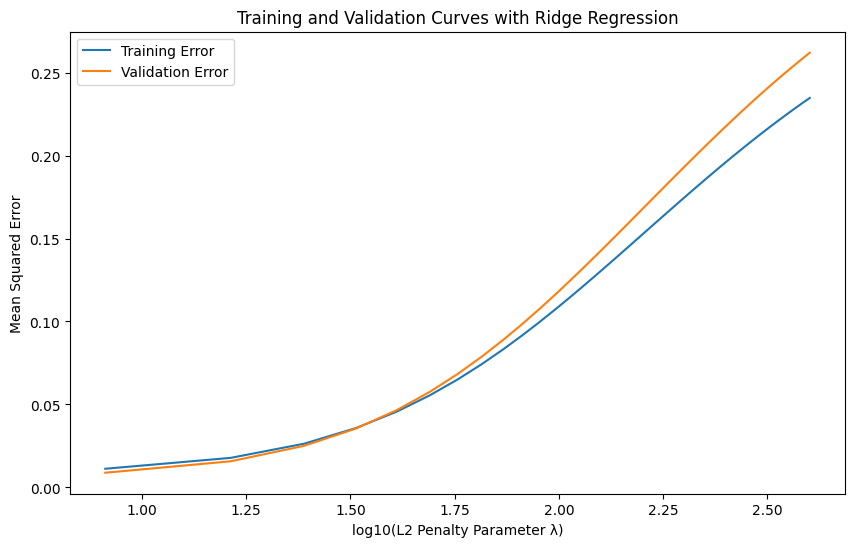

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + 0.1 * np.random.randn(100)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Set up a range of L2 penalty parameters (λ)
l2_values = np.linspace(0,400)

# Train and validate Ridge regression models with different L2 penalty parameters
train_errors = []
val_errors = []

for l2 in l2_values:
    ridge_model = Ridge(alpha=l2)
    ridge_model.fit(X_train_scaled, y_train)

    # Calculate training error
    y_train_pred = ridge_model.predict(X_train_scaled)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Calculate validation error
    y_val_pred = ridge_model.predict(X_val_scaled)
    val_error = mean_squared_error(y_val, y_val_pred)
    val_errors.append(val_error)

# Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(np.log10(l2_values), train_errors, label='Training Error')
plt.plot(np.log10(l2_values), val_errors, label='Validation Error')
plt.title('Training and Validation Curves with Ridge Regression')
plt.xlabel('log10(L2 Penalty Parameter λ)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load data
raw_data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')
raw_data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


## data preprocess


In this project, we will focus on 5 features relevant to the price: 
- age
- gender
- annual salary
- credit card debt
- net worth. 

In addition, the response is column "car purchase amount"

In [6]:
# remove useless columns for prediction
raw_data.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)
raw_data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.492000,46.241674,62127.239608,9607.645049,431475.713625,44105.799218
std,0.500437,7.978862,11703.378228,3489.187973,173536.756340,10959.051567
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,0.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## seperate raw data into X and y

In [7]:
X_raw = raw_data.drop (["car purchase amount"], axis = 1)
X_raw.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [8]:
y_raw = raw_data['car purchase amount']
y_raw.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

## Normalization

Because Min/Max values are in different ranges among columns, it is required to rescale the data

In [9]:
Scaler = MinMaxScaler()

X = Scaler.fit_transform(X_raw)
y = Scaler.fit_transform(y_raw.values.reshape(-1,1)) # reshaping y values to be column vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
all_data_sets = [X_train, X_test, y_train, y_test]

In [12]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Calculate Mean Absolute Error for Linear Regression
mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)

# Print the MAE for Linear Regression
print(f'Linear Regression - Train MAE: {mae_linear_train}')
print(f'Linear Regression - Test MAE: {mae_linear_test}')

# Print the Math Expression of the Linear Regression Predictor
coefficients = linear_model.coef_.flatten()
intercept = linear_model.intercept_[0]

print('\nMath Expression of the Linear Regression Predictor:')
print(f'y = {intercept:.4f}', end=' ')
for i, coef in enumerate(coefficients):
    print(f'+ {coef:.4f} * {X_raw.columns[i]}', end=' ')

Linear Regression - Train MAE: 0.004765595770717635
Linear Regression - Test MAE: 0.00364008609267273

Math Expression of the Linear Regression Predictor:
y = -0.3267 + 0.0028 * gender + 0.5934 * age + 0.6391 * annual Salary + -0.0078 * credit card debt + 0.4177 * net worth 

In [10]:

pd.DataFrame(
    data = {
    'train_set': [X_train.shape, y_train.shape],
    'test_set': [X_test.shape, y_test.shape]
    }   
    , index=['X', 'y']
)

,train_set,test_set
X,"(400, 5)","(100, 5)"
y,"(400, 1)","(100, 1)"


In [13]:
import itertools
from collections import namedtuple

PerformanceMetrics = namedtuple('PerformanceMetrics', ['train_mae', 'test_mae'])

activation_types = ['relu', 'sigmoid', 'linear']
neuron_count_1 = [5,10,15]
neuron_count_2 = [5,10,15]
optimizers = ['adam', 'sgd', 'nadam']

combinations = list(itertools.product(activation_types, neuron_count_1,neuron_count_2, optimizers))

def create_and_evaluate_model(combo,all_data_sets):
    X_train, X_test, y_train, y_test = all_data_sets
    activation_type, neuron_count_1, neuron_count_2, optimizer = combo
    
    
    model = Sequential([
        Dense(neuron_count_1, activation=activation_type, input_dim=5),
        Dense(neuron_count_2, activation=activation_type),
        Dense(1, activation='linear')
    ])
    

    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

    # Train and evaluate the model on your dataset here
    history = model.fit(X_train, y_train, epochs =100, validation_split= 0.1)
    
    # Evaluate the model on the test set
    test_metrics = model.evaluate(X_test, y_test)
    
    # Return the performance metrics (e.g., mean absolute error) as the result
    # Access the training and validation MAE from the history object
    train_mae = history.history['mean_absolute_error']
    test_mae = test_metrics[1]
    #test_mae = history.history['val_mean_absolute_error']
    return model,PerformanceMetrics(train_mae, test_mae)

In [14]:
results = {}
models = {}
for combo in combinations:
    #activation_type, neuron_count_1, neuron_count_2, optimizer = combo
    models[combo],results[combo] = create_and_evaluate_model(combo,all_data_sets)
with open("results.pkl","wb") as f:    
    pickle.dump(results,f)
with open("models.pkl","wb") as f:  
    pickle.dump(models,f)
with open("combinations.pkl","wb") as f:      
    pickle.dump(combinations,f)

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 0.8076 - mean_absolute_error: 0.8076 - val_loss: 0.7114 - val_mean_absolute_error: 0.7114
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7224 - mean_absolute_error: 0.7224 - val_loss: 0.6410 - val_mean_absolute_error: 0.6410
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6450 - mean_absolute_error: 0.6450 - val_loss: 0.5789 - val_mean_absolute_error: 0.5789
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5776 - mean_absolute_error: 0.5776 - val_loss: 0.5222 - val_mean_absolute_error: 0.5222
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - val_loss: 0.4749 - val_mean_absolute_error: 0.4749
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - val_loss: 0.4341 - val_mean_absolute_error: 0.4341
Epoch 7/100
12/12 [==

Linear Regression - Train MAE: 0.004765595770717635
Linear Regression - Test MAE: 0.00364008609267273


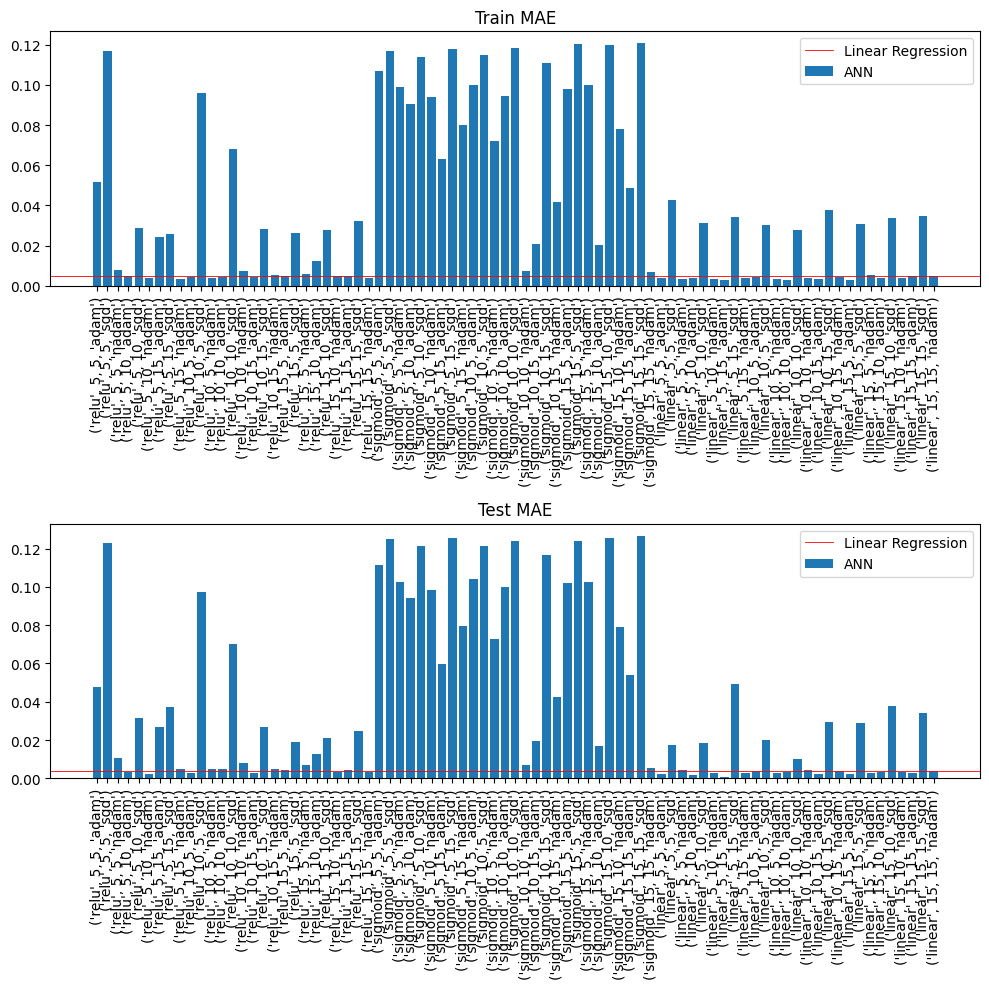

,Combination,Train MAE,Test MAE
61,"('linear', 5, 15, 'adam')",0.003181,0.000908
58,"('linear', 5, 10, 'adam')",0.004120,0.001653
6,"('relu', 5, 10, 'nadam')",0.003985,0.002087
70,"('linear', 10, 15, 'adam')",0.003312,0.002209
55,"('linear', 5, 5, 'adam')",0.003691,0.002322
73,"('linear', 15, 5, 'adam')",0.003162,0.002430
63,"('linear', 5, 15, 'nadam')",0.004098,0.002567
66,"('linear', 10, 5, 'nadam')",0.003352,0.002596
16,"('relu', 10, 15, 'adam')",0.004614,0.002702
75,"('linear', 15, 5, 'nadam')",0.005288,0.002716


In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Calculate Mean Absolute Error for Linear Regression
mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)

# Print the MAE for Linear Regression
print(f'Linear Regression - Train MAE: {mae_linear_train}')
print(f'Linear Regression - Test MAE: {mae_linear_test}')


# Initialize a Dataframe with result of Linear Regression
linear_combination = ('linear_regression')
lr_df = pd.DataFrame({
    'Combination': [linear_combination],
    'Train MAE': [mae_linear_train],
    'Test MAE': [mae_linear_test]
})


# Create a list of dictionaries where each dictionary represents a combination
ANN_rs_data = []
for combo in combinations:
    ANN_rs_data.append({
        'Combination': combo,
        'Train MAE': results[combo].train_mae[-1],
        'Test MAE': results[combo].test_mae
    })
  
ann_df = pd.DataFrame(ANN_rs_data)    

train_mae_values = ann_df["Train MAE"]
test_mae_values=ann_df["Test MAE"]


# Concatenate the Linear Regression data to the DataFrame
final_df = pd.concat([lr_df, ann_df], ignore_index=True)
final_df = final_df.sort_values(by='Test MAE', ascending=True)



# Create two subplots to plot results of training and testing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

x = np.arange(len(combinations))

# Create bar chart for ANN results then add result of Linear Regression result as reference
ax1.bar(x, train_mae_values, label='ANN')
ax2.bar(x, test_mae_values, label='ANN')

# Add horizontal line for linear regression 
ax1.axhline(y=mae_linear_train, color='red', linewidth=0.6,linestyle='-', label='Linear Regression')
ax2.axhline(y=mae_linear_test, color='red', linewidth=0.6,linestyle='-', label='Linear Regression')

ax1.set_title('Train MAE')
ax2.set_title('Test MAE')

ax1.set_xticks(x)
ax1.set_xticklabels(combinations, rotation=90)
ax2.set_xticks(x)
ax2.set_xticklabels(combinations, rotation=90)

# Display the legend
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()


# Display the updated DataFrame
# Function to highlight the desired row
def highlight_row(row):
    return ['background-color: yellow' if row['Combination'] == 'linear_regression' else '' for _ in row]

styled_df = final_df.style.apply(highlight_row, axis=1)
display(styled_df)


## Best ANN model

In [23]:
best_ann = models[('linear', 5, 15, 'adam')]
best_pred = best_ann.predict(X_test)
best_mae = mean_absolute_error(y_test, best_pred)

4/4 [==============================] - 0s 2ms/step


0.0009076501902577944

## Statistical tests

In [30]:
import scipy.stats as stats

print(f"Size of the testing data: {len(y_test)}")

# Variance check for a two-tailed test
variance_pred = np.var(best_pred)
variance_actual = np.var(y_test)

print(f"Variance of the predicted samples:{variance_pred}", )
print(f"Variance of the actual values: {variance_actual}", )

# Standard Deviation of the predicted sample
std_dev_pred = np.sqrt(variance_pred)
print(f"Standard Deviation of the predicted samples: {std_dev_pred}")

# Ratio
ratio = variance_pred / variance_actual
print(f"Ratio for checking nearly equal variance: {ratio}")
# Run t-test
tstat, t_pval = stats.ttest_ind(a=best_pred, b=y_test, equal_var=True)
print(f"T-Statistics: {tstat[0]}  \n P Value: {t_pval[0]}")

Size of the testing data: 100
Variance of the predicted samples:0.023863060399889946
Variance of the actual values: 0.02418430102297285
Standard Deviation of the predicted samples: 0.15447673201560974
Ratio for checking nearly equal variance: 0.9867169771506832
T-Statistics: 0.014189267700237804  
 P Value: 0.9886932693102701
